In [1]:
import os 
import pandas as pd
import numpy as np
# Calculate consecutive lengths
from itertools import groupby
import matplotlib.pyplot as plt

# Load all the files

In [12]:

file_dir = 'Data/states_and_words_and_gaze/'

# List to store individual DataFrames
dataframes = []
all_data = []
mapping = {'A': 1, 'B': 2, 'C': 3}
consecutive_lengths = {}
for filename in os.listdir(file_dir):
    filepath = os.path.join(file_dir, filename)
    data = pd.read_csv(filepath)
    all_data.append(filepath)
    # Deal with the features
    data = data[['Speak','word_speak']]    
    data['Speak'] = data['Speak'].map(mapping)
    data['Speak'] = data['Speak'].fillna(0).values
    data['word_speak'] = data['word_speak'].fillna('').values
    

    speak_values = data["Speak"].tolist()
    
    
    for key, group in groupby(speak_values):
        length = len(list(group))
        if key in consecutive_lengths:
            consecutive_lengths[key].append(length)
        else:
            consecutive_lengths[key] = [length]

    
    # Append to list of DataFrames
    dataframes.append(data)


# Concatenate all DataFrames row-wise
df_combined = pd.concat(dataframes, ignore_index=True)

C:\Users\DreamFall\AppData\Local\Temp\ipykernel_36804\841316753.py:10: DtypeWarning: Columns (8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath)


# Speaking Status Distribution

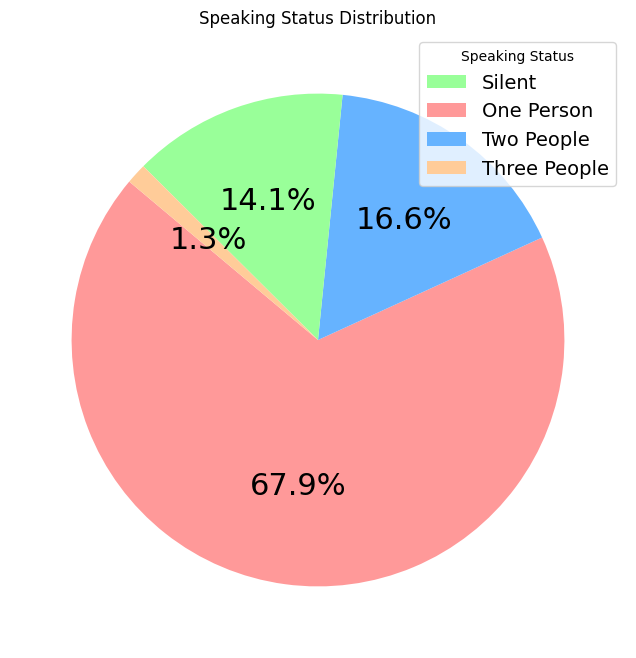

In [3]:

# Mapping the Sum_ABC values to meaningful labels
label_mapping = {
    0: "Silent",
    1: "One Person",
    2: "Two People",
    3: "Three People"
}
# Counting occurrences and renaming labels
value_counts = df_combined["Sum_ABC"].value_counts(normalize=True) * 100  # Convert to percentage
labels = [label_mapping[val] for val in value_counts.index]

# Define the color palette (choosing distinct colors)
custom_colors = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99"]  # Example: Red, Blue, Green, Orange

# Plot the pie chart with custom colors and larger percentages
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    value_counts,
    labels=[None] * len(value_counts),
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors[:len(value_counts)]  # Apply custom colors
)

# Increase the font size of the percentage labels
for autotext in autotexts:
    autotext.set_fontsize(22)
    autotext.set_color("black")

# Reordering the legend to match the desired order
desired_order = [0, 1, 2, 3]  # Corresponding to Silent, One Person, Two People, Three People
ordered_labels = [label_mapping[val] for val in desired_order]
ordered_wedges = [wedges[list(value_counts.index).index(val)] for val in desired_order if val in value_counts.index]

# Adding legend with the desired order
plt.legend(ordered_wedges, ordered_labels, title="Speaking Status", loc="upper right", fontsize = 14)

# Updating title to reflect meaning
plt.title("Speaking Status Distribution")

# Display the updated pie chart
plt.show()
# plt.savefig("speaking distribution.png")


## show one speaker speaking distribution

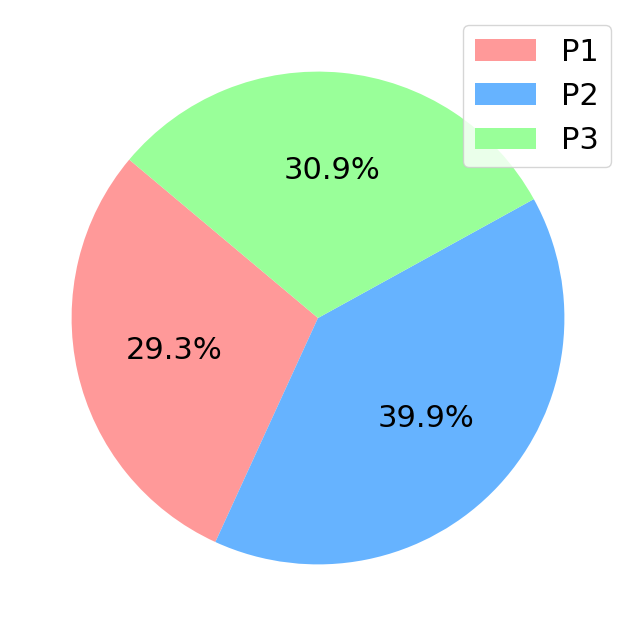

In [7]:
import matplotlib.pyplot as plt
count_A_1 = (df_combined["A"] == 1).sum()
count_B_1 = (df_combined["B"] == 1).sum()
count_C_1 = (df_combined["C"] == 1).sum()



# Mapping the Sum_ABC values to meaningful labels
label_mapping = {
    0: "P1",
    1: "P2",
    2: "P3"
}
# Counting occurrences and renaming labels
# value_counts = df_combined["Sum_ABC"].value_counts(normalize=True) * 100  # Convert to percentage

value_counts = [count_A_1, count_B_1, count_C_1]/(count_A_1 + count_B_1+count_C_1)*100
labels = [label_mapping[i] for i in range(3)]

# Define the color palette (choosing distinct colors)
custom_colors = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99"]  # Example: Red, Blue, Green, Orange

# Plot the pie chart with custom colors and larger percentages
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    value_counts,
    labels=[None] * len(value_counts),
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors[:len(value_counts)]  # Apply custom colors
)

# Increase the font size of the percentage labels
for autotext in autotexts:
    autotext.set_fontsize(22)
    autotext.set_color("black")

# Adding legend with the desired order
plt.legend(wedges, labels, loc="upper right", fontsize = 22)

# Updating title to reflect meaning
# plt.title("Speaking Status Distribution")

# Display the updated pie chart
plt.show()
# plt.savefig("speaking distribution across speaker.png")


In [5]:
data[data['word_speak']!='']

,Speak,word_speak
71,2.0,about
72,2.0,about
73,2.0,about
74,2.0,these
75,2.0,these
...,...,...
24449,1.0,nope
24450,1.0,nope
24451,1.0,nope
24452,1.0,nope


In [13]:
# Convert results to a DataFrame for better visualization
length_df = pd.DataFrame([(key, length) for key, lengths in consecutive_lengths.items() for length in lengths],
                         columns=["Speak", "Length"])

# Group by (Speak, Length) and count occurrences
length_df["Count"] = length_df.groupby(["Speak", "Length"])["Length"].transform('count')
# Drop duplicates to keep unique (Speak, Length) combinations
length_df = length_df.drop_duplicates().reset_index(drop=True)

# Filter for Speak == 0
speak_0_df = length_df[length_df["Speak"] == 0]

# Sort by Length for better visualization
speak_0_df = speak_0_df.sort_values(by="Length")

speaking_df =  length_df[length_df["Speak"] != 0]

# Sort by Length for better visualization
speaking_df = speaking_df.sort_values(by="Length")

# Create a new DataFrame to count how many lengths are greater than 1, 3, 5, etc.
odd_lengths = list(range(1, 30, 2))
cumulative_counts_0 = [speak_0_df[speak_0_df["Length"] > length]["Count"].sum() for length in odd_lengths]
cumulative_counts_others = [speaking_df[speaking_df["Length"] > length]["Count"].sum() for length in odd_lengths]

# Create a DataFrame
cumulative_df_0 = pd.DataFrame({"Min Length": odd_lengths, "Count Greater": cumulative_counts_0})
cumulative_df_others = pd.DataFrame({"Min Length": odd_lengths, "Count Greater": cumulative_counts_others})
cumulative_df_0['cover percent'] = cumulative_df_0['Count Greater']/cumulative_df_0['Count Greater'][0]*100
cumulative_df_others['cover percent'] = cumulative_df_others['Count Greater']/cumulative_df_others['Count Greater'][0]*100

## Drawing some graph

In [15]:
temp = speak_0_df[speak_0_df['Length']<1000]

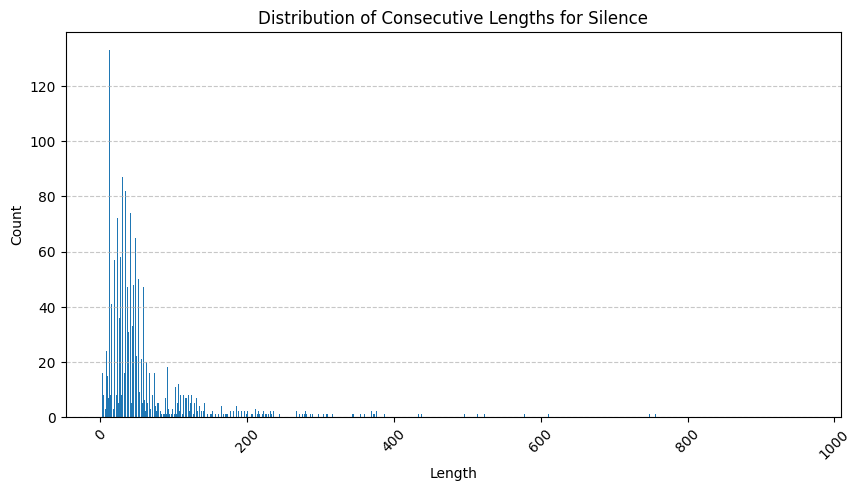

In [16]:
# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(temp["Length"], temp["Count"])
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Consecutive Lengths for Silence")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


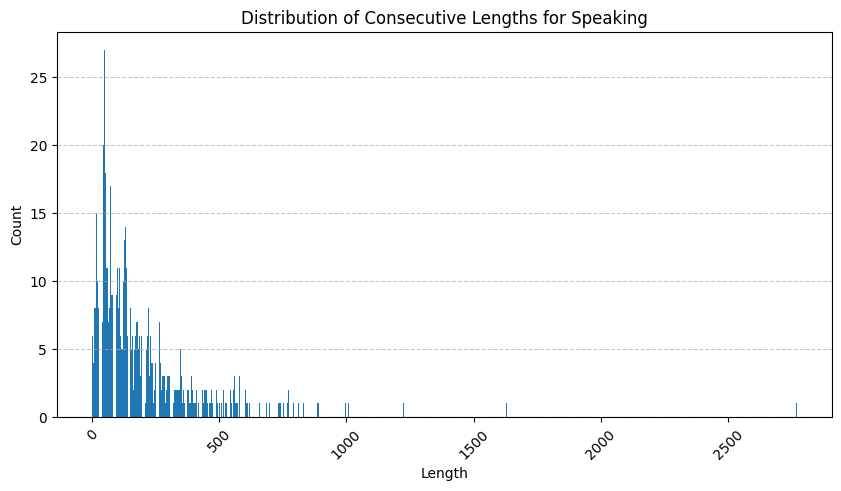

In [17]:
# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(speaking_df["Length"], speaking_df["Count"])
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Consecutive Lengths for Speaking")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

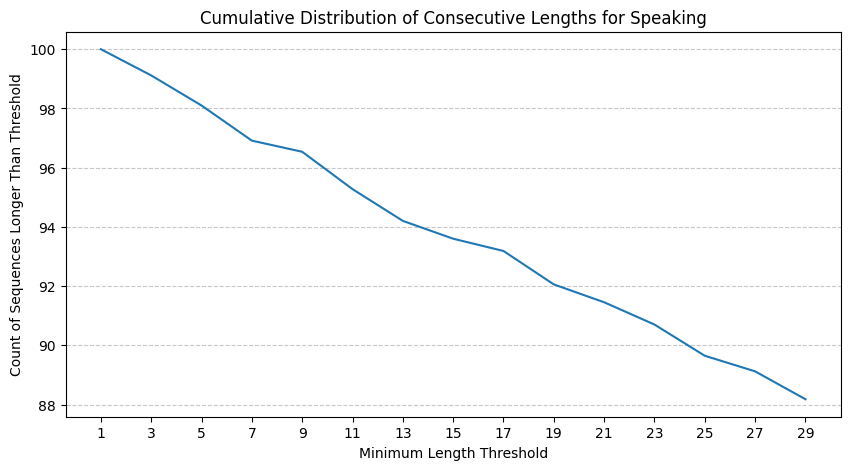

In [18]:
# Plot the cumulative distribution graph with odd-numbered x-ticks
plt.figure(figsize=(10, 5))
plt.plot(cumulative_df_others["Min Length"], cumulative_df_others["cover percent"])

# Set labels and title
plt.xlabel("Minimum Length Threshold")
plt.ylabel("Count of Sequences Longer Than Threshold")
plt.title("Cumulative Distribution of Consecutive Lengths for Speaking")

# Set x-ticks to only odd numbers
plt.xticks(cumulative_df_others["Min Length"])

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

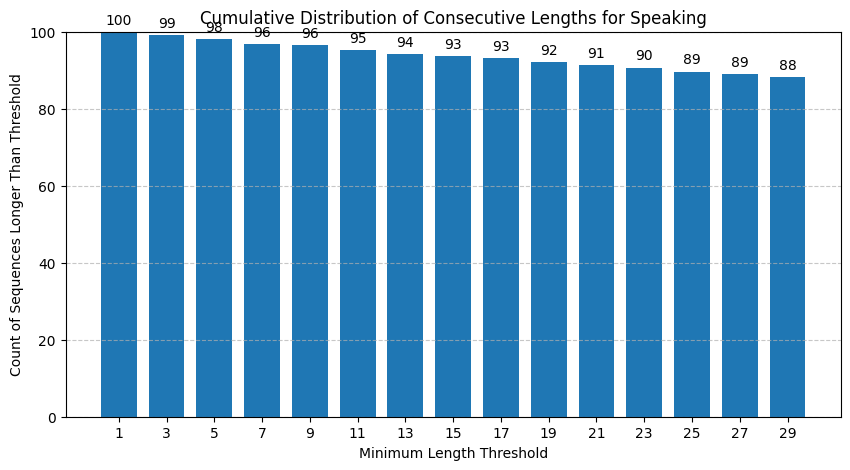

In [19]:
# Plot the cumulative distribution as a bar chart with y-axis from 0 to 100
plt.figure(figsize=(10, 5))
bars = plt.bar(cumulative_df_others["Min Length"], cumulative_df_others["cover percent"], width=1.5)

# Set labels and title
plt.xlabel("Minimum Length Threshold")
plt.ylabel("Count of Sequences Longer Than Threshold")
plt.title("Cumulative Distribution of Consecutive Lengths for Speaking")

# Set x-ticks to only odd numbers
plt.xticks(cumulative_df_others["Min Length"])

# Set y-axis limit from 0 to 100
plt.ylim(0, 100)

# Annotate each bar with the count value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, str(int(height)), ha='center', fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


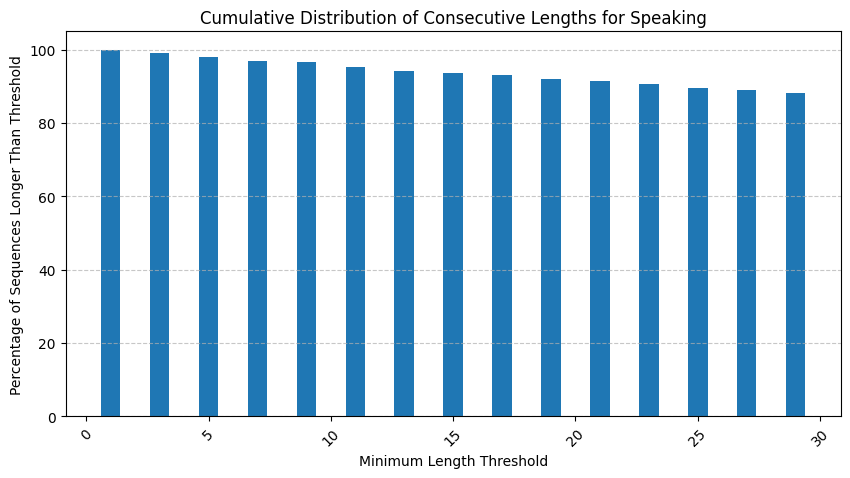

In [20]:
plt.figure(figsize=(10, 5))
plt.bar(cumulative_df_others["Min Length"], cumulative_df_others["cover percent"])
plt.xlabel("Minimum Length Threshold")
plt.ylabel("Percentage of Sequences Longer Than Threshold")
plt.title("Cumulative Distribution of Consecutive Lengths for Speaking")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

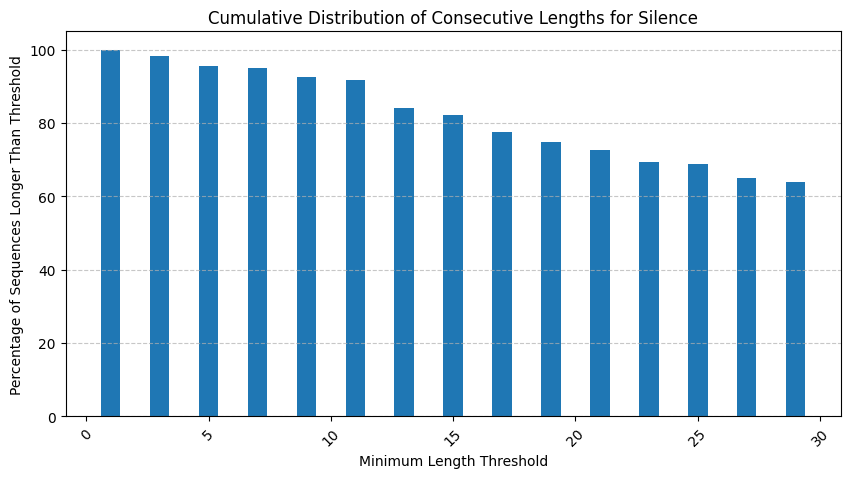

In [21]:
plt.figure(figsize=(10, 5))
plt.bar(cumulative_df_0["Min Length"], cumulative_df_0["cover percent"])
plt.xlabel("Minimum Length Threshold")
plt.ylabel("Percentage of Sequences Longer Than Threshold")
plt.title("Cumulative Distribution of Consecutive Lengths for Silence")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Output the numbers

In [106]:
speak_0_df.to_csv("../Data/Stats/Silence_counts.csv")
speaking_df.to_csv("../Data/Stats/Speaking_counts.csv")
cumulative_df_0.to_csv("../Data/Stats/Silence_min_percentage.csv")
cumulative_df_others.to_csv("../Data/Stats/Speaking_min_percentage.csv")

## Calculate average lengths

In [84]:
# Compute the weighted average length for each Speak category
average_lengths = length_df.groupby("Speak").apply(lambda x: (x["Length"] * x["Count"]).sum() / x["Count"].sum())

# Convert to DataFrame for better readability
average_length_df = average_lengths.reset_index(name="Average Length")

C:\Users\HP\AppData\Local\Temp\ipykernel_9456\3685827210.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_lengths = length_df.groupby("Speak").apply(lambda x: (x["Length"] * x["Count"]).sum() / x["Count"].sum())


In [90]:
average_lengths

Speak
0.0     63.032430
1.0    148.150389
2.0    172.292151
3.0    162.537398
dtype: float64

In [87]:
average_length_df

,Speak,Average Length
0,0.0,63.032430
1,1.0,148.150389
2,2.0,172.292151
3,3.0,162.537398


In [22]:
from Utils.data import *


In [23]:
state_files='Data/states_and_words_and_gaze/'
word_files='Data/Word/'
audio_files='Data/audio/'
motion_files='Data/Mocap/'
gaze_files='Data/Gaze/'
prosody_files ='Data/Prosody/'

State_filenames =[]
Word_filenames =[]
Audio_filenames =[]
Gaze_filenames =[]
Motion_filenames =[]
Prosody_filenames= []

# assert len(GazeAudioBack_filenames) == len(Prosody_filenames) == len(Text_filenames) == len(Label_filenames)

# all_date=["12-15-2021","01-28-2022","02-11-2022","03-04-2022","03-05-2022","03-11-2022","03-12-2022"]
# all_sessions=[['1','2','3','4'],['1','2','3','4','5','6'],['2','3'],['1','2','3'],['1','2'],['1','2','3'],['1','2','3']]

all_date=["01-28-2022","02-11-2022","03-04-2022","03-05-2022","03-11-2022","03-12-2022"]
all_sessions=[['1','2','3','4','5','6'],['2','3'],['1','2','3'],['1','2'],['1','2','3'],['1','2','3']]

for idd, all_session in enumerate(all_sessions):
    date=all_date[idd]
    for session in all_session:

        p1_a=audio_files+date+"/Session_"+session+"_PC_1_audio.wav"
        p2_a=audio_files+date+"/Session_"+session+"_PC_2_audio.wav"
        p3_a=audio_files+date+"/Session_"+session+"_PC_3_audio.wav"
        p1_w=word_files+date+"/Session_"+session+"_PC_1_words.csv"
        p2_w=word_files+date+"/Session_"+session+"_PC_2_words.csv"
        p3_w=word_files+date+"/Session_"+session+"_PC_3_words.csv"
        p_s=state_files+date+"_Session"+session+".csv"
        p1_g=gaze_files+date+"/Session_"+session+"_PC_1_EyeTracker_data_gapfilled.txt"
        p2_g=gaze_files+date+"/Session_"+session+"_PC_2_EyeTracker_data_gapfilled.txt"
        p3_g=gaze_files+date+"/Session_"+session+"_PC_3_EyeTracker_data_gapfilled.txt"
        p1_m=motion_files+date+"/Session_"+session+"_PC_1_mocap_data.txt"
        p2_m=motion_files+date+"/Session_"+session+"_PC_2_mocap_data.txt"
        p3_m=motion_files+date+"/Session_"+session+"_PC_3_mocap_data.txt"

        pro= prosody_files+date+"_Session_"+session+"_prosody.csv"
        
        State_filenames.append(p_s)
        Word_filenames.append([p1_w,p2_w,p3_w])
        Audio_filenames.append([p1_a,p2_a,p3_a])
        Gaze_filenames.append([p1_g,p2_g,p3_g])
        Motion_filenames.append([p1_m,p2_m,p3_m])
        Prosody_filenames.append(pro)

assert len(State_filenames) == len(Word_filenames) == len(Audio_filenames) == len(Gaze_filenames) == len(Motion_filenames)
        # p1_sentence = pd.read_csv(p1_s)
        # p2_sentence = pd.read_csv(p2_s)
        # p3_sentence = pd.read_csv(p3_s)
#         p1_word = pd.read_csv(p1_w)
#         p2_word = pd.read_csv(p2_w)
#         p3_word = pd.read_csv(p3_w)
        # data="../../Turn taking and keeping/3people/"+date+"/Session_"+session+"_gazeBehavior.txt"
        # gaze = pd.read_csv(data,sep='\t')
        # audio = pd.DataFrame(0, index=np.arange(len(gaze)), columns=['P1 audio', 'P2 audio', 'P3 audio'])
        # audio['P1_SID']='0'
        # audio['P2_SID']='0'
        # audio['P3_SID']='0'
        

In [25]:
# Define chunking parameters
window_frames = 600  # 10 seconds * 60 FPS
stride_frames = 540   # 1 second * 60 FPS

# Lists to store all chunks
all_motion_1_chunks, all_motion_2_chunks, all_motion_3_chunks = [], [], []


for i in range(len(State_filenames)):
# for i in range(3):
    # Load motion and identity data
    motion_1, identity_1 = motion_load(Motion_filenames[i][0])
    motion_2, identity_2 = motion_load(Motion_filenames[i][1])
    motion_3, identity_3 = motion_load(Motion_filenames[i][2])

   

    # Chunk motion, gaze, and word data
    # chunk_motion = chunk_dataframe(aligned_data[0], window_frames, stride_frames)
    all_motion_1_chunks.append(motion_1)
    all_motion_2_chunks.append(motion_2)
    all_motion_3_chunks.append(motion_3)

   



# all_motion_1_chunks = np.array(all_motion_1_chunks)
# all_motion_2_chunks = np.array(all_motion_2_chunks)
# all_motion_3_chunks = np.array(all_motion_3_chunks)


# Find out head shaking and nodding frequency

In [26]:
def assign_states(angles, threshold):
    num_frames = len(angles)
    states = [None] * num_frames
    
    for i in range(num_frames):
        if i == 0 or i == num_frames - 1:
            continue  # First and last frames have no states
        
        min_index = max(0, i - 2)
        max_index = min(num_frames - 1, i + 2)
        neighboring_angles = angles[min_index:max_index + 1]
        
        max_angle = np.max(neighboring_angles)
        min_angle = np.min(neighboring_angles)
        
        if max_angle - min_angle <= threshold:
            states[i] = "stable"
        elif max_angle == angles[i] or min_angle == angles[i]:
            states[i] = "extreme"
        else:
            states[i] = "transient"
    
    return states

def gestural_algorithm(angles, states, threshold):
    num_frames = len(angles)
    movements = np.zeros(num_frames, dtype=int)
    
    stable_indices = [i for i, state in enumerate(states) if state == "stable"]
    
    for idx in range(len(stable_indices) - 1):
        frame_range = range(stable_indices[idx], stable_indices[idx + 1] + 1)
        extreme_indices = [i for i in frame_range if states[i] == "extreme"]
        
        if len(extreme_indices) >= 2:
            headshaking = all(
                abs(angles[extreme_indices[j]] - angles[extreme_indices[j + 1]]) > threshold
                for j in range(len(extreme_indices) - 1)
            )
            
            if headshaking:
                for i in frame_range:
                    movements[i] = 1
    
    return movements

def detect_head_shaking(angle_arrays, threshold):
    results = []
    for angles in angle_arrays:
        states = assign_states(angles, threshold)
        movements = gestural_algorithm(angles, states, threshold)
        results.append(movements)
    
    return results


def calculate_headshake_frequency(headshaking_result, frame_rate=None):
    total_shakes = np.sum(headshaking_result)  # Count occurrences of 1
    
    total_frames = len(headshaking_result)
    shake_rate = total_shakes / total_frames  # Ratio of head shakes to total frames

    if frame_rate:  # If we know the frame rate (frames per second)
        duration_seconds = total_frames / frame_rate
        shakes_per_second = total_shakes / duration_seconds
        return total_shakes, shake_rate, shakes_per_second

    return total_shakes, shake_rate

In [27]:
# Initialize accumulators
total_shakes_accumulated = 0
shake_rate_accumulated = 0
shakes_per_second_accumulated = 0

num_chunks = len(all_motion_1_chunks)  # Number of chunks

for i in range(num_chunks):
    # Define threshold for head shaking detection
    headshaking_threshold = 2  # Adjust as needed
    
    # Detect head shaking
    movement_flags = detect_head_shaking([all_motion_1_chunks[i]['head_z'].values], headshaking_threshold)
    
    # The result is a list containing a 1D array of movement flags (0 = no shaking, 1 = shaking)
    headshaking_result = movement_flags[0]

    # Compute metrics
    total_shakes, shake_rate = calculate_headshake_frequency(headshaking_result)
    
    # If you know the frame rate, e.g., 30 FPS:
    frame_rate = 30  # Adjust based on actual FPS
    total_shakes, shake_rate, shakes_per_second = calculate_headshake_frequency(headshaking_result, frame_rate)

    # Accumulate values
    total_shakes_accumulated += total_shakes
    shake_rate_accumulated += shake_rate
    shakes_per_second_accumulated += shakes_per_second

# Compute averages
if num_chunks > 0:
    avg_total_shakes = total_shakes_accumulated / num_chunks
    avg_shake_rate = shake_rate_accumulated / num_chunks
    avg_shakes_per_second = shakes_per_second_accumulated / num_chunks
else:
    avg_total_shakes = avg_shake_rate = avg_shakes_per_second = 0

# Print averages
print(f"Average Total Head Shakes: {avg_total_shakes:.2f}")
print(f"Average Head Shaking Rate: {avg_shake_rate:.4f}")
print(f"Average Head Shakes per Second: {avg_shakes_per_second:.2f}")


Average Total Head Shakes: 412.11
Average Head Shaking Rate: 0.0084
Average Head Shakes per Second: 0.25


In [28]:
# Initialize accumulators
total_shakes_accumulated = 0
shake_rate_accumulated = 0
shakes_per_second_accumulated = 0

num_chunks = len(all_motion_1_chunks)  # Number of chunks

for i in range(num_chunks):
    # Define threshold for head shaking detection
    headshaking_threshold = 2  # Adjust as needed
    
    # Detect head shaking
    movement_flags = detect_head_shaking([all_motion_1_chunks[i]['head_y'].values], headshaking_threshold)
    
    # The result is a list containing a 1D array of movement flags (0 = no shaking, 1 = shaking)
    headshaking_result = movement_flags[0]

    # Compute metrics
    total_shakes, shake_rate = calculate_headshake_frequency(headshaking_result)
    
    # If you know the frame rate, e.g., 30 FPS:
    frame_rate = 30  # Adjust based on actual FPS
    total_shakes, shake_rate, shakes_per_second = calculate_headshake_frequency(headshaking_result, frame_rate)

    # Accumulate values
    total_shakes_accumulated += total_shakes
    shake_rate_accumulated += shake_rate
    shakes_per_second_accumulated += shakes_per_second

# Compute averages
if num_chunks > 0:
    avg_total_shakes = total_shakes_accumulated / num_chunks
    avg_shake_rate = shake_rate_accumulated / num_chunks
    avg_shakes_per_second = shakes_per_second_accumulated / num_chunks
else:
    avg_total_shakes = avg_shake_rate = avg_shakes_per_second = 0

# Print averages
print(f"Average Total Head Shakes: {avg_total_shakes:.2f}")
print(f"Average Head Shaking Rate: {avg_shake_rate:.4f}")
print(f"Average Head Shakes per Second: {avg_shakes_per_second:.2f}")


Average Total Head Shakes: 463.79
Average Head Shaking Rate: 0.0093
Average Head Shakes per Second: 0.28


# Find motion amplitude

In [29]:
all_state=[]
all_prosody = []
for i in range(len(State_filenames)):
    data = pd.read_csv(State_filenames[i])
    
    data["A"] = data["A"].replace(2, 1)
    data["B"] = data["B"].replace(2, 1)
    data["C"] = data["C"].replace(2, 1)
    all_state.append(data)
    all_prosody.append(pd.read_csv(Prosody_filenames[i]))
    

C:\Users\DreamFall\AppData\Local\Temp\ipykernel_36804\4266595431.py:4: DtypeWarning: Columns (8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(State_filenames[i])


In [30]:
filtered_df = all_motion_1_chunks[1].filter(like='clavicle', axis=1).join(
    all_motion_1_chunks[1].filter(like='humerus', axis=1)
).join(
    all_motion_1_chunks[1].filter(like='radius', axis=1)
).join(
    all_motion_1_chunks[1].filter(like='hand', axis=1)
)

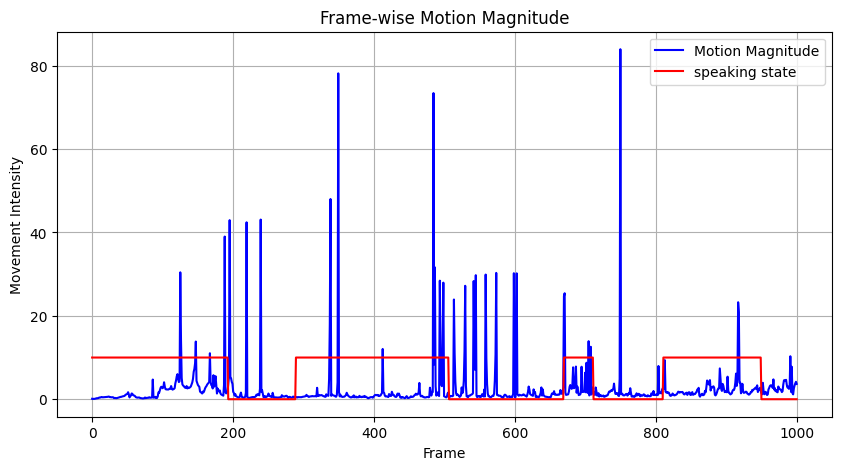

In [31]:
start = 19000
end = 20000
# Compute velocity (difference between consecutive frames)
velocity = np.diff(filtered_df, axis=0)

# Compute motion magnitude (L2 norm per frame)
motion_magnitude = np.linalg.norm(velocity, axis=1)

# Plot motion magnitude over time
plt.figure(figsize=(10, 5))
plt.plot(motion_magnitude[start:end], label="Motion Magnitude", color="blue")
plt.plot( all_state[1]['A'][start:end].values*10, label="speaking state", color="red")
plt.xlabel("Frame")
plt.ylabel("Movement Intensity")
plt.title("Frame-wise Motion Magnitude")
plt.legend()
plt.grid(True)

# Highlight the frame with the highest motion
# max_frame = np.argmax(motion_magnitude) + 1  # Adjust for 1-based indexing
# plt.axvline(x=max_frame, color='red', linestyle='--', label=f"Peak Motion at Frame {max_frame}")
plt.legend()

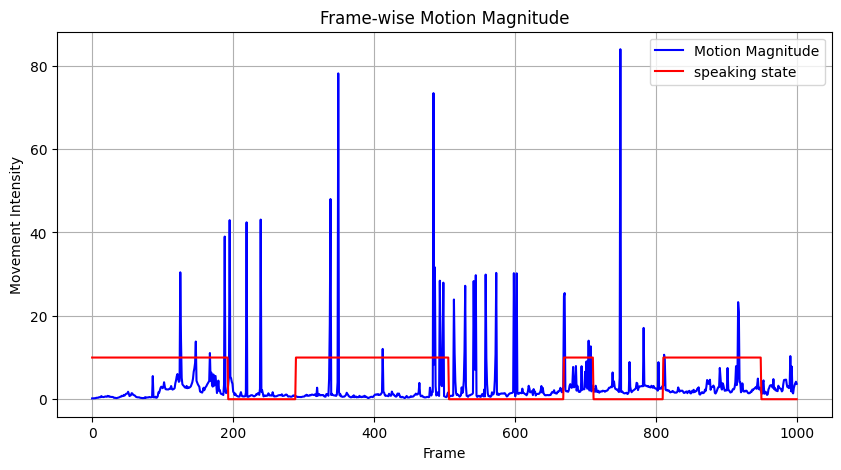

In [37]:
start = 19000
end = 20000
# Compute velocity (difference between consecutive frames)
velocity = np.diff(all_motion_1_chunks[1], axis=0)

# Compute motion magnitude (L2 norm per frame)
motion_magnitude = np.linalg.norm(velocity, axis=1)

# Plot motion magnitude over time
plt.figure(figsize=(10, 5))
plt.plot(motion_magnitude[start:end], label="Motion Magnitude", color="blue")
plt.plot( all_state[1]['A'][start:end].values*10, label="speaking state", color="red")
plt.xlabel("Frame")
plt.ylabel("Movement Intensity")
plt.title("Frame-wise Motion Magnitude")
plt.legend()
plt.grid(True)

# Highlight the frame with the highest motion
# max_frame = np.argmax(motion_magnitude) + 1  # Adjust for 1-based indexing
# plt.axvline(x=max_frame, color='red', linestyle='--', label=f"Peak Motion at Frame {max_frame}")
plt.legend()

In [33]:
motion_magnitude.shape

(33462,)

In [34]:
all_state[1]['A'].values.shape

(33463,)

In [35]:
all_prosody[1]['p1_intensity'].values.shape

(33438,)

In [38]:
import scipy.stats
# Ensure motion_magnitude and speaking state have the same length
min_length = min(len(motion_magnitude), len(all_prosody[1]['p1_intensity'].values))

# Trim both arrays to the same length
motion_magnitude = motion_magnitude[:min_length]
aligned_speaking_state = all_prosody[1]['p1_intensity'].values[:min_length]

# Compute Pearson correlation (measures linear correlation)
pearson_corr, _ = scipy.stats.pearsonr(motion_magnitude, aligned_speaking_state)

# Compute Spearman correlation (measures monotonic relationship)
spearman_corr, _ = scipy.stats.spearmanr(motion_magnitude, aligned_speaking_state)

print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}")

Pearson Correlation: -0.0211
Spearman Correlation: -0.0297


In [39]:
from scipy.signal import correlate

# Normalize both signals
motion_norm = (motion_magnitude - np.mean(motion_magnitude)) / np.std(motion_magnitude)
speaking_norm = (aligned_speaking_state - np.mean(aligned_speaking_state)) / np.std(aligned_speaking_state)

# Compute cross-correlation
cross_corr = correlate(motion_norm, speaking_norm, mode="full")
lags = np.arange(-len(motion_magnitude) + 1, len(motion_magnitude))

# Find the lag with the highest correlation
best_lag = lags[np.argmax(cross_corr)]
print(f"Best lag: {best_lag} frames")


Best lag: -5884 frames


In [40]:
print(len(motion_magnitude), len(aligned_speaking_state))


33438 33438


In [41]:
motion_magnitude = np.array(motion_magnitude, dtype=np.float64)
aligned_speaking_state = np.array(aligned_speaking_state, dtype=np.float64)

In [43]:
df = pd.DataFrame({
    "Motion Magnitude": motion_magnitude,
    "Speaking State": aligned_speaking_state
})

In [281]:
df.to_csv("motion_and_intensity.csv")

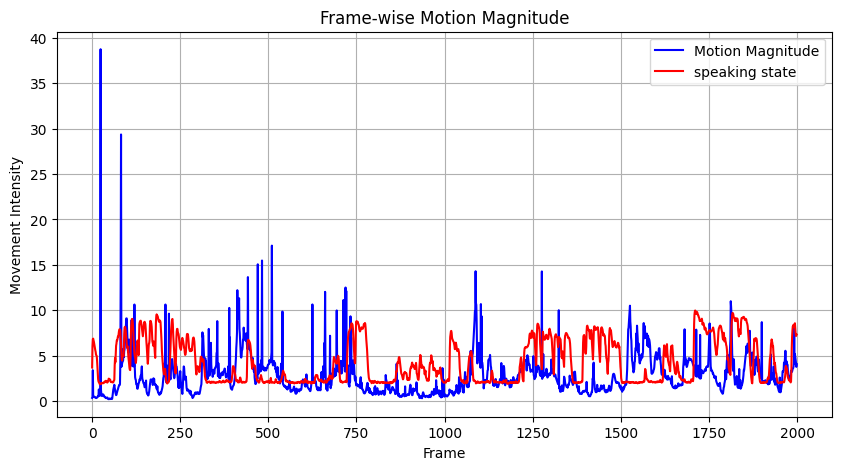

In [49]:
start = 16000
end = 18000
plt.figure(figsize=(10, 5))
plt.plot(motion_magnitude[start:end], label="Motion Magnitude", color="blue")
plt.plot(aligned_speaking_state[start:end]*10, label="speaking state", color="red")
plt.xlabel("Frame")
plt.ylabel("Movement Intensity")
plt.title("Frame-wise Motion Magnitude")
plt.legend()
plt.grid(True)